In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
people = pd.read_csv('people.csv')
train = pd.read_csv('act_train.csv')

In [3]:
print 'Shape people dataset:', people.shape
print 'Shape train dataset:', train.shape

Shape people dataset: (189118, 41)
Shape train dataset: (2197291, 15)


In [ ]:
# Remove type label from people dataset
for d in range(1,10):
    people['char_%d' % d] = people['char_%d' % d].str.strip('type ').astype(int)
    
# Rename columns
people.columns = [people.columns[0]] + ['p_' + c for c in people.columns[1:]]

# Remove type label from people dataset
train.fillna('0', inplace=True)
for d in range(1,11):
    train['char_%d' % d] = train['char_%d' % d].str.strip('type ').astype(int)
train['activity_category'] = train['activity_category'].str.strip('type ').astype(int)

In [5]:
merged = pd.merge(people, train, how='inner', on='people_id')

In [6]:
merged.shape

(2197291, 55)

In [7]:
merged.columns

Index([u'people_id', u'p_char_1', u'p_group_1', u'p_char_2', u'p_date',
       u'p_char_3', u'p_char_4', u'p_char_5', u'p_char_6', u'p_char_7',
       u'p_char_8', u'p_char_9', u'p_char_10', u'p_char_11', u'p_char_12',
       u'p_char_13', u'p_char_14', u'p_char_15', u'p_char_16', u'p_char_17',
       u'p_char_18', u'p_char_19', u'p_char_20', u'p_char_21', u'p_char_22',
       u'p_char_23', u'p_char_24', u'p_char_25', u'p_char_26', u'p_char_27',
       u'p_char_28', u'p_char_29', u'p_char_30', u'p_char_31', u'p_char_32',
       u'p_char_33', u'p_char_34', u'p_char_35', u'p_char_36', u'p_char_37',
       u'p_char_38', u'activity_id', u'date', u'activity_category', u'char_1',
       u'char_2', u'char_3', u'char_4', u'char_5', u'char_6', u'char_7',
       u'char_8', u'char_9', u'char_10', u'outcome'],
      dtype='object')

In [8]:
merged.head()

,people_id,p_char_1,p_group_1,p_char_2,p_date,p_char_3,p_char_4,p_char_5,p_char_6,p_char_7,...,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,2,group 17304,2,2021-06-29,5,5,5,3,11,...,-1,-1,-1,-1,-1,-1,-1,-1,76,0
1,ppl_100,2,group 17304,2,2021-06-29,5,5,5,3,11,...,-1,-1,-1,-1,-1,-1,-1,-1,1,0
2,ppl_100,2,group 17304,2,2021-06-29,5,5,5,3,11,...,-1,-1,-1,-1,-1,-1,-1,-1,1,0
3,ppl_100,2,group 17304,2,2021-06-29,5,5,5,3,11,...,-1,-1,-1,-1,-1,-1,-1,-1,1,0
4,ppl_100,2,group 17304,2,2021-06-29,5,5,5,3,11,...,-1,-1,-1,-1,-1,-1,-1,-1,1,0


In [9]:
activity = merged.groupby('people_id')

In [10]:
activity.size().sort_values(ascending=False).head()

people_id
ppl_294918    55103
ppl_370270    53668
ppl_105739    45936
ppl_54699     23969
ppl_64887      7052
dtype: int64

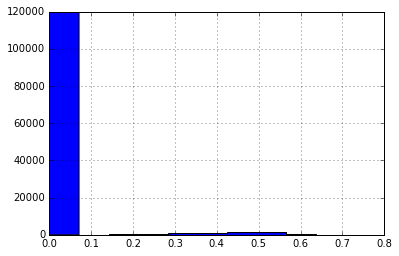

In [11]:
activity.outcome.std().hist()
# There are a couple of people_id values that and have multiple outcomes

In [12]:
C = merged.corr()

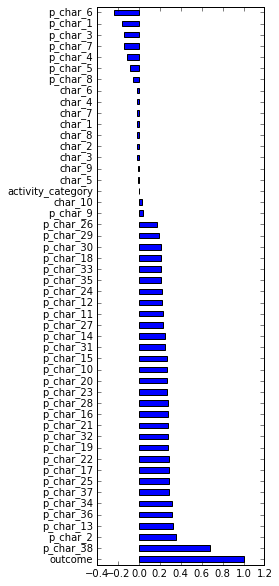

In [13]:
C.outcome.sort_values(ascending=False).plot(kind='barh', figsize=(3,10))

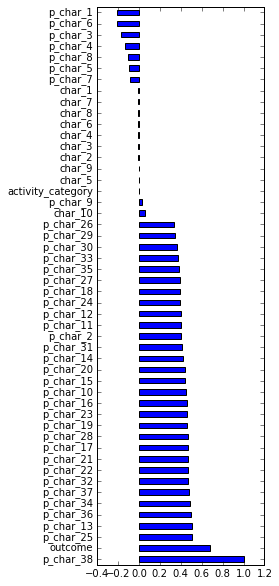

In [14]:
C.p_char_38.sort_values(ascending=False).plot(kind='barh', figsize=(3,10))

In [16]:
fea_count = 0 
for c in merged.columns:
    print('Feat %s nunique: %d' % (c,merged[c].nunique()))
    if merged[c].nunique()<55:
        fea_count+=merged[c].nunique()
print('Total features: %d' % fea_count)

Feat people_id nunique: 151295
Feat p_char_1 nunique: 2
Feat p_group_1 nunique: 29899
Feat p_char_2 nunique: 3
Feat p_date nunique: 1196
Feat p_char_3 nunique: 43
Feat p_char_4 nunique: 25
Feat p_char_5 nunique: 9
Feat p_char_6 nunique: 7
Feat p_char_7 nunique: 25
Feat p_char_8 nunique: 8
Feat p_char_9 nunique: 9
Feat p_char_10 nunique: 2
Feat p_char_11 nunique: 2
Feat p_char_12 nunique: 2
Feat p_char_13 nunique: 2
Feat p_char_14 nunique: 2
Feat p_char_15 nunique: 2
Feat p_char_16 nunique: 2
Feat p_char_17 nunique: 2
Feat p_char_18 nunique: 2
Feat p_char_19 nunique: 2
Feat p_char_20 nunique: 2
Feat p_char_21 nunique: 2
Feat p_char_22 nunique: 2
Feat p_char_23 nunique: 2
Feat p_char_24 nunique: 2
Feat p_char_25 nunique: 2
Feat p_char_26 nunique: 2
Feat p_char_27 nunique: 2
Feat p_char_28 nunique: 2
Feat p_char_29 nunique: 2
Feat p_char_30 nunique: 2
Feat p_char_31 nunique: 2
Feat p_char_32 nunique: 2
Feat p_char_33 nunique: 2
Feat p_char_34 nunique: 2
Feat p_char_35 nunique: 2
Feat p_ch